In [23]:
import numpy as np
import pandas as pd
import os
import pdb
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats as stats

np.random.seed(97)

In [2]:
m = ["A", "C", "G", "T"]
def id2seq(ids):
    return "".join([m[i] for i in ids])

In [3]:
expression_percentile_thres = 90
ensemble_predictions_dir = "/global/scratch/users/aniketh/promoter_modelling/jax_data/ensemble_predictions/"

In [4]:
os.listdir(ensemble_predictions_dir)

['filtered_ensemble_1_predictions.parquet',
 'dataset_seqs_eval_2.pkl',
 'filtered_coms_sequences_ensemble_2_6mer_counts_pairwise_euclidean_distances.npy',
 'dataset_seqs_eval_3.pkl',
 'all_ensemble_2_predictions.parquet',
 'filtered_coms_sequences_ensemble_1_6mer_counts.npy',
 'filtered_coms_sequences_ensemble_2_6mer_counts.npy',
 'all_ensemble_predictions.parquet',
 'filtered_ensemble_2_predictions.parquet',
 'filtered_dens_sequences_ensemble_1.parquet',
 'dataset_seqs_eval.pkl',
 'filtered_ensemble_3_predictions.parquet',
 'filtered_dens_sequences_ensemble_3.parquet',
 'all_ensemble_1_predictions.parquet',
 'coms_seqs_eval_3.pkl',
 'sequences_from_batch_1_expression_spectrum_eval_3.pkl',
 'filtered_coms_sequences_ensemble_2.parquet',
 'coms_seqs_eval_2.pkl',
 'filtered_dens_sequences_ensemble_2_6mer_counts.npy',
 'filtered_coms_sequences_ensemble_1.parquet',
 'filtered_coms_sequences_ensemble_3.parquet',
 'den_seqs_eval_3.pkl',
 'filtered_dens_sequences_ensemble_2.parquet',
 'sequen

In [5]:
dataset_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "dataset_seqs_eval_3.pkl"), "rb"))
sequences_from_batch_1_expression_spectrum = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_from_batch_1_expression_spectrum_eval_3.pkl"), "rb"))
sequences_generated_using_DE_motifs = pickle.load(open(os.path.join(ensemble_predictions_dir, "sequences_generated_using_DE_motifs_eval_3.pkl"), "rb"))
coms_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "coms_seqs_eval_3.pkl"), "rb"))
dens_sequences = pickle.load(open(os.path.join(ensemble_predictions_dir, "den_seqs_eval_3.pkl"), "rb"))

In [6]:
# process COMs sequences
coms_df = {}
coms_df["design_method"] = []
coms_df["designed_for"] = []
coms_df["original_sequence"] = []
coms_df["sequence"] = []
coms_df["provenance"] = []
coms_df["coms_alpha"] = []
coms_df["diversity_loss_coef"] = []
coms_df["entropy_loss_coef"] = []
coms_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    coms_df[cell + "_ensemble_mean"] = []
    coms_df[cell + "_ensemble_std"] = []
    coms_df[cell + "_all_ensemble_preds"] = []
    coms_df[cell + "_design_model"] = []
    coms_df[cell + "_measured"] = []

ori_sequences = [id2seq(i) for i in coms_sequences["original_seq"]]

for cell in ["jurkat", "k562", "thp1"]:
    print(cell)
    sequences = [id2seq(i) for i in coms_sequences[f"{cell}_optimized_seq"]]
    
    corrected_cell_name = cell.upper()
    if cell == "jurkat":
        corrected_cell_name = "Jurkat"
    
    coms_df["designed_for"] += [corrected_cell_name for i in range(len(sequences))]
    coms_df["original_sequence"] += ori_sequences.copy()
    coms_df["sequence"] += ["".join(i) for i in sequences]
    coms_df["coms_alpha"] += list(coms_sequences["coms_loss_weight"])
    coms_df["provenance"] += [None for i in sequences]
    coms_df["diversity_loss_coef"] += [None for i in sequences]
    coms_df["entropy_loss_coef"] += [None for i in sequences]
    coms_df["base_entropy_loss_coef"] += [None for i in sequences]
    coms_df["design_method"] += ["COMs" for i in sequences]
    
    for cell2 in ["Jurkat", "K562", "THP1"]:
        coms_df[cell2 + "_ensemble_mean"] += list(coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"].mean(axis=0))
        coms_df[cell2 + "_ensemble_std"] += list(coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"].std(axis=0))
        coms_df[cell2 + "_all_ensemble_preds"] += [coms_sequences[f"ensemble_{cell}_optimized_seq_{cell2.lower()}_pred"]]
        coms_df[cell2 + "_design_model"] += list(coms_sequences[f"{cell}_opt_seq_{cell2.lower()}_pred"])
        coms_df[cell2 + "_measured"] += [None for i in sequences]

cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    coms_df[cell2 + "_all_ensemble_preds"] = np.hstack(coms_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = coms_df[cell2 + "_all_ensemble_preds"].copy()
    coms_df.pop(cell2 + "_all_ensemble_preds")

coms_df = pd.DataFrame(coms_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    coms_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(coms_df.shape[0])]
    
coms_df

jurkat
k562
thp1


design_method designed_for  \
0               COMs       Jurkat   
1               COMs       Jurkat   
2               COMs       Jurkat   
3               COMs       Jurkat   
4               COMs       Jurkat   
...              ...          ...   
306427          COMs         THP1   
306428          COMs         THP1   
306429          COMs         THP1   
306430          COMs         THP1   
306431          COMs         THP1   

                                        original_sequence  \
0       GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...   
1       ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...   
2       CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...   
3       AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...   
4       ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...   
...                                                   ...   
306427  TACCTTATTCTTTAATGATTGCTTGTCACCATACGGATGAATCAGA...   
306428  CCAACACCCTACCTTTCTCTCTCTGGACCCACTTCCTCTTGCTGCC...   
306429  TGGTTTTTGCAGTCACACAGCTTTCCGAGACCCTCGTCCAGAGCAG...   
306430  GAAGGGCAGACAGCTGCCAGATACTTGCACCCCATTCCCTGGGGCC...   
306431  GAAGGGGTGGGGAGGGGAGAGAGTCCCTTTCAGTGCCCAAGCCTGT...   

                                                 sequence provenance  \
0       TCGAATAGTCCTATAAGCTCGTAAACTCCTACGCCACTATTCAGTA...       None   
1       TCAGGTGGGGGGGGGGCTTCGCGAGGCGCGCTGTCGTAAAATCGGC...       None   
2       CGTGATGTCATTCCGTGGGGAATCATTATGTATCAATAGGTATGCC...       None   
3       ATGGTGAGAATTCATTAGTTAGTAAATAATGAGGGCGGGGGCGTGA...       None   
4       AATGGCACGCGTAAACGGCATGTAAAGCCATAGAGCAGGTAAGGCG...       None   
...                                                   ...        ...   
306427  ATCCACGTTCAGGATTGATTCCACGTCACTTCCGTATTGAAAAGCA...       None   
306428  GCAGCTCACTTCCGTCATCCTTCTTCGGCTACTTCCGCAGAAGTCC...       None   
306429  AGGGCTGTTGAGCAAAGAGGATAGCCGGGTCTCTGGTAGGCAGTAT...       None   
306430  TCTGGTCTGGCAGCTGGTAGCAATTTGAGCGGCTTTCTCTTTGCCT...       None   
306431  CCCAAGGAAAAAAAAAAGCCAACTCCTGCGCAGGTCCTTGTCCTGT...       None   

        coms_alpha diversity_loss_coef entropy_loss_coef  \
0             0.00                None              None   
1             0.00                None              None   
2             0.00                None              None   
3             0.00                None              None   
4             0.00                None              None   
...            ...                 ...               ...   
306427        0.03                None              None   
306428        0.03                None              None   
306429        0.03                None              None   
306430        0.03                None              None   
306431        0.03                None              None   

       base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_ensemble_std  \
0                        None              1.165271  ...           0.229776   
1                        None              1.504872  ...           0.226883   
2                        None              1.760434  ...           0.275651   
3                        None              0.731873  ...           0.171308   
4                        None              1.467339  ...           0.326940   
...                       ...                   ...  ...                ...   
306427                   None             -0.156087  ...           0.081135   
306428                   None              0.514839  ...           0.247723   
306429                   None             -0.297145  ...           0.123635   
306430                   None             -0.403780  ...           0.111872   
306431                   None             -0.499646  ...           0.084732   

        K562_design_model K562_measured  THP1_ensemble_mean  \
0                0.804079          None            0.104879   
1                1.947420          None            0.351601   
2                1.120590          None            0.356914   
3                0.617886          None   

In [7]:
# process DENs sequences
dens_df = {}
dens_df["design_method"] = []
dens_df["designed_for"] = []
dens_df["original_sequence"] = []
dens_df["sequence"] = []
dens_df["coms_alpha"] = []
dens_df["provenance"] = []
dens_df["diversity_loss_coef"] = []
dens_df["entropy_loss_coef"] = []
dens_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    dens_df[cell + "_ensemble_mean"] = []
    dens_df[cell + "_ensemble_std"] = []
    dens_df[cell + "_all_ensemble_preds"] = []
    dens_df[cell + "_design_model"] = []
    dens_df[cell + "_measured"] = []
    
dens_df["designed_for"] += list(dens_sequences["designed_for"])
dens_df["design_method"] += ["DENs" for i in dens_sequences["sequence"]]
dens_df["original_sequence"] += [None for i in dens_sequences["sequence"]]

dens_df["sequence"] += [id2seq(i) for i in dens_sequences["sequence"]]

dens_df["provenance"] += [None for i in dens_sequences["sequence"]]
dens_df["coms_alpha"] += [float(i.split("_")[1]) for i in dens_sequences["design_model"]]
dens_df["diversity_loss_coef"] += list(dens_sequences["diversity_loss_coef"])
dens_df["entropy_loss_coef"] += list(dens_sequences["entropy_loss_coef"])
dens_df["base_entropy_loss_coef"] += list(dens_sequences["base_entropy_loss_coef"])

for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_ensemble_mean"] += list(dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    dens_df[cell2 + "_ensemble_std"] += list(dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    dens_df[cell2 + "_all_ensemble_preds"] += [dens_sequences[f"ensemble_sequence_{cell2.lower()}_pred"]]
    dens_df[cell2 + "_design_model"] += list(dens_sequences[f"{cell2}"])
    dens_df[cell2 + "_measured"] += [None for i in dens_sequences["designed_for"]]
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_all_ensemble_preds"] = np.hstack(dens_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = dens_df[cell2 + "_all_ensemble_preds"].copy()
    dens_df.pop(cell2 + "_all_ensemble_preds")

dens_df = pd.DataFrame(dens_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    dens_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(dens_df.shape[0])]
    
dens_df

design_method designed_for original_sequence  \
0               DENs         THP1              None   
1               DENs         THP1              None   
2               DENs         THP1              None   
3               DENs         THP1              None   
4               DENs         THP1              None   
...              ...          ...               ...   
117498          DENs         K562              None   
117499          DENs         K562              None   
117500          DENs         K562              None   
117501          DENs         K562              None   
117502          DENs         K562              None   

                                                 sequence  coms_alpha  \
0       AACAAATTTTAATATACTACAGCTTCGGCCTTGCTTTTTTTTTTTT...      0.0003   
1       AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...      0.0003   
2       AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...      0.0003   
3       AACAAATTTTAATATACTACAGCTTCGGCCTTGCTTTTTTTTTTTT...      0.0003   
4       AACAAATTTTAATATACTACAGCTTCGGCCTTGCATTTTTTTTTTT...      0.0003   
...                                                   ...         ...   
117498  ACAAAAAACCAAAAAAGACCCCCAAAAAGCCCGCCCAACAAAAACG...      0.0000   
117499  AAACAACAAACACCAACACCAAAACCAAACCCCACCAAAAAAAAAA...      0.0000   
117500  AAAAAACAGCCCCAAAAACAAACACAAAAAAAAAACAACCCCGAAA...      0.0000   
117501  CACCCCCACACCCAAACCGAAACCACCACCCAAAAACCCCCCACAA...      0.0000   
117502  AAAAACCAGCCCCCCCCGGAAAAAAAAAAGAACCAGCAAAAACGAC...      0.0000   

       provenance  diversity_loss_coef  entropy_loss_coef  \
0            None                  1.0                1.0   
1            None                  1.0                1.0   
2            None                  1.0                1.0   
3            None                  1.0                1.0   
4            None                  1.0                1.0   
...           ...                  ...                ...   
117498       None                 10.0                1.0   
117499       None                 10.0                1.0   
117500       None                 10.0                1.0   
117501       None                 10.0                1.0   
117502       None                 10.0                1.0   

        base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_ensemble_std  \
0                          5.0              0.170583  ...           0.178964   
1                          5.0              0.270872  ...           0.185431   
2                          5.0              0.255403  ...           0.226704   
3                          5.0              0.379870  ...           0.258978   
4                          5.0              0.207935  ...           0.162064   
...                        ...                   ...  ...                ...   
117498                    10.0              0.843191  ...           0.367568   
117499                    10.0              0.745527  ...           0.362164   
117500                    10.0              0.885547  ...           0.395256   
117501                    10.0              0.766825  ...           0.340411   
117502                    10.0              0.871662  ...           0.384927   

        K562_design_model K562_measured  THP1_ensemble_mean  \
0                0.161597          None            0.461584   
1                0.177417          None            0.513512   
2                0.298792          None            0.579485   
3                0.211093          None            0.602037   
4                0.064643          None            0.445790   
...                   ...           ...                 ...   
117498           2.265131          None            0.425019   
117499           2.271510          None            0.442479   
117500           2.358301          None            0.520794   
117501           2.284508          None            0.401425   
117502           2.256965          None            0.511215   

        THP1_ensem

In [8]:
# process original dataset sequences
dataset_df = {}
dataset_df["design_method"] = []
dataset_df["designed_for"] = []
dataset_df["original_sequence"] = []
dataset_df["sequence"] = []
dataset_df["coms_alpha"] = []
dataset_df["provenance"] = []
dataset_df["diversity_loss_coef"] = []
dataset_df["entropy_loss_coef"] = []
dataset_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    dataset_df[cell + "_ensemble_mean"] = []
    dataset_df[cell + "_ensemble_std"] = []
    dataset_df[cell + "_all_ensemble_preds"] = []
    dataset_df[cell + "_design_model"] = []
    dataset_df[cell + "_measured"] = []

dataset_df["designed_for"] += [None for i in dataset_sequences["sequences"]]
dataset_df["design_method"] += ["Dataset" for i in dataset_sequences["sequences"]]
dataset_df["original_sequence"] += [None for i in dataset_sequences["sequences"]]

dataset_df["sequence"] += [id2seq(i) for i in dataset_sequences["sequences"]]

dataset_df["provenance"] += [None for i in dataset_sequences["sequences"]]
dataset_df["coms_alpha"] += [None for i in dataset_sequences["sequences"]]
dataset_df["diversity_loss_coef"] += [None for i in dataset_sequences["sequences"]]
dataset_df["entropy_loss_coef"] += [None for i in dataset_sequences["sequences"]]
dataset_df["base_entropy_loss_coef"] += [None for i in dataset_sequences["sequences"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_ensemble_mean"] += list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].mean(axis=0))
    dataset_df[cell2 + "_ensemble_std"] += list(dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"].std(axis=0))
    dataset_df[cell2 + "_all_ensemble_preds"] += [dataset_sequences[f"ensemble_sequences_{cell2.lower()}_pred"]]
    dataset_df[cell2 + "_design_model"] += [None for i in dataset_sequences["sequences"]]
    dataset_df[cell2 + "_measured"] += list(dataset_sequences[f"{cell2.lower()}_output"])
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_all_ensemble_preds"] = np.hstack(dataset_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = dataset_df[cell2 + "_all_ensemble_preds"].copy()
    dataset_df.pop(cell2 + "_all_ensemble_preds")

dataset_df = pd.DataFrame(dataset_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    dataset_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(dataset_df.shape[0])]
    
dataset_df

design_method designed_for original_sequence  \
0           Dataset         None              None   
1           Dataset         None              None   
2           Dataset         None              None   
3           Dataset         None              None   
4           Dataset         None              None   
...             ...          ...               ...   
17099       Dataset         None              None   
17100       Dataset         None              None   
17101       Dataset         None              None   
17102       Dataset         None              None   
17103       Dataset         None              None   

                                                sequence coms_alpha  \
0      GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...       None   
1      ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...       None   
2      CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...       None   
3      AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...       None   
4      ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...       None   
...                                                  ...        ...   
17099  ATGTGGGCCATTTACTGTCACTCATCTGTTGGTCATTTTACTTCCT...       None   
17100  GAATGTATGTACATTTGTTCCTGAGATACAGGTTGATGGACGGATG...       None   
17101  CTGGGGCTGGGCAGAGGGCAGGGAGGGGAAGGGTCCTGACCTCTGA...       None   
17102  CCTTCCAAATCCTCCTCCTAGAAGCCCTCCTTGGTTGGCCCTGCCT...       None   
17103  CCCCAAGATTAACCAGTTCTGTCCTGTCAGCAGGAGCAGGCAACTA...       None   

      provenance diversity_loss_coef entropy_loss_coef base_entropy_loss_coef  \
0           None                None              None                   None   
1           None                None              None                   None   
2           None                None              None                   None   
3           None                None              None                   None   
4           None                None              None                   None   
...          ...                 ...               ...                    ...   
17099       None                None              None                   None   
17100       None                None              None                   None   
17101       None                None              None                   None   
17102       None                None              None                   None   
17103       None                None              None                   None   

       Jurkat_ensemble_mean  ...  K562_ensemble_std K562_design_model  \
0                  2.333388  ...           0.369419              None   
1                  0.359461  ...           0.093098              None   
2                  0.639255  ...           0.088977              None   
3                  1.412151  ...           0.343934              None   
4                 -0.339083  ...           0.091204              None   
...                     ...  ...                ...               ...   
17099             -0.016810  ...           0.178176              None   
17100             -0.516982  ...           0.093847              None   
17101             -0.615490  ...           0.091157              None   
17102             -0.333871  ...           0.089734              None   
17103              0.642522  ...           0.865709              None   

       K562_measured  THP1_ensemble_mean  THP1_ensemble_std THP1_design_model  \
0           2.849015            1.144823           0.188056              None   
1           0.141496           -0.081394           0.065340              None   
2           0.849015            0.012676           0.057115              None   
3           1.433977            0.644935           0.179293              None   
4          -0.943467           -0.219006           0.046275              None   
...              ...                 ...                ...               ...   
17099      -0.528565            0.169432           0.087314              None   
17100 

In [9]:
# process sequences from full spectrum of batch 1 expression
sequences_from_batch_1_expression_spectrum_df = {}
sequences_from_batch_1_expression_spectrum_df["design_method"] = []
sequences_from_batch_1_expression_spectrum_df["designed_for"] = []
sequences_from_batch_1_expression_spectrum_df["original_sequence"] = []
sequences_from_batch_1_expression_spectrum_df["sequence"] = []
sequences_from_batch_1_expression_spectrum_df["provenance"] = []
sequences_from_batch_1_expression_spectrum_df["coms_alpha"] = []
sequences_from_batch_1_expression_spectrum_df["diversity_loss_coef"] = []
sequences_from_batch_1_expression_spectrum_df["entropy_loss_coef"] = []
sequences_from_batch_1_expression_spectrum_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    sequences_from_batch_1_expression_spectrum_df[cell + "_ensemble_mean"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_ensemble_std"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_all_ensemble_preds"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_design_model"] = []
    sequences_from_batch_1_expression_spectrum_df[cell + "_measured"] = []

sequences_from_batch_1_expression_spectrum_df["designed_for"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["design_method"] += ["batchI_expression_spectrum" for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["original_sequence"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]

sequences_from_batch_1_expression_spectrum_df["sequence"] += [id2seq(i) for i in sequences_from_batch_1_expression_spectrum["sequence"]]

sequences_from_batch_1_expression_spectrum_df["provenance"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["coms_alpha"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["diversity_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["entropy_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
sequences_from_batch_1_expression_spectrum_df["base_entropy_loss_coef"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_ensemble_mean"] += list(sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_ensemble_std"] += list(sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] += [sequences_from_batch_1_expression_spectrum[f"ensemble_sequence_{cell2.lower()}_pred"]]
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_design_model"] += [None for i in sequences_from_batch_1_expression_spectrum["sequence"]]
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_measured"] += list(sequences_from_batch_1_expression_spectrum[f"{cell2}"])
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] = np.hstack(sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"].copy()
    sequences_from_batch_1_expression_spectrum_df.pop(cell2 + "_all_ensemble_preds")

sequences_from_batch_1_expression_spectrum_df = pd.DataFrame(sequences_from_batch_1_expression_spectrum_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_from_batch_1_expression_spectrum_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(sequences_from_batch_1_expression_spectrum_df.shape[0])]
    
sequences_from_batch_1_expression_spectrum_df

design_method designed_for original_sequence  \
0    batchI_expression_spectrum         None              None   
1    batchI_expression_spectrum         None              None   
2    batchI_expression_spectrum         None              None   
3    batchI_expression_spectrum         None              None   
4    batchI_expression_spectrum         None              None   
..                          ...          ...               ...   
936  batchI_expression_spectrum         None              None   
937  batchI_expression_spectrum         None              None   
938  batchI_expression_spectrum         None              None   
939  batchI_expression_spectrum         None              None   
940  batchI_expression_spectrum         None              None   

                                              sequence provenance coms_alpha  \
0    CTGGGCTTGGAGGGCTCTAGGACCCAGCAACCTGCGCAGGGTGAAG...       None       None   
1    TCCTTTCATTTTGAGAAGAAGGAGGGAGGGGAGGGGGGACTTGGGG...       None       None   
2    CGAGCCCGGCTCGCCGAGGCCTCCCCACGCCCCCGCGGGGGTGGAG...       None       None   
3    AGGAGGAGAGGAGGCAGCGCCCGGCCAGGCTGGGAGCACCTACGGC...       None       None   
4    GGGCGCCTGAGGGTCCCGGCCACCCGAGAAGGGGGCTTCTTAATCG...       None       None   
..                                                 ...        ...        ...   
936  AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...       None       None   
937  AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...       None       None   
938  GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...       None       None   
939  GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...       None       None   
940  GCAAGTGGGCAGTGAGTGTGCCACGGACTGGCCTGGGCTGTGGCCT...       None       None   

    diversity_loss_coef entropy_loss_coef base_entropy_loss_coef  \
0                  None              None                   None   
1                  None              None                   None   
2                  None              None                   None   
3                  None              None                   None   
4                  None              None                   None   
..                  ...               ...                    ...   
936                None              None                   None   
937                None              None                   None   
938                None              None                   None   
939                None              None                   None   
940                None              None                   None   

     Jurkat_ensemble_mean  ...  K562_ensemble_std K562_design_model  \
0                1.458010  ...           0.164992              None   
1               -0.310277  ...           0.076787              None   
2               -0.442134  ...           0.137390              None   
3                0.167896  ...           0.137828              None   
4                0.702149  ...           0.135570              None   
..                    ...  ...                ...               ...   
936              4.539459  ...           1.352914              None   
937             -0.396737  ...           0.094404              None   
938              4.029407  ...           2.079571              None   
939              2.160121  ...           0.429191              None   
940             -0.409076  ...           0.059530              None   

     K562_measured  THP1_ensemble_mean  THP1_ensemble_std THP1_design_model  \
0         0.821810            0.539450           0.146264              None   
1        -2.993798           -0.155123           0.077864              None   
2        -3.788144           -0.201386           0.059530              None   
3         1.487552            0.151584           0.103233              None   
4        -3.549167            0.294097           0.107933              None   
..             ...                 ...                ...               ...   
936       5.882017            3.801559   

In [10]:
# process sequences from full spectrum of batch 1 expression
sequences_generated_using_DE_motifs_df = {}
sequences_generated_using_DE_motifs_df["design_method"] = []
sequences_generated_using_DE_motifs_df["designed_for"] = []
sequences_generated_using_DE_motifs_df["original_sequence"] = []
sequences_generated_using_DE_motifs_df["sequence"] = []
sequences_generated_using_DE_motifs_df["provenance"] = []
sequences_generated_using_DE_motifs_df["coms_alpha"] = []
sequences_generated_using_DE_motifs_df["diversity_loss_coef"] = []
sequences_generated_using_DE_motifs_df["entropy_loss_coef"] = []
sequences_generated_using_DE_motifs_df["base_entropy_loss_coef"] = []

for cell in ["Jurkat", "K562", "THP1"]:    
    sequences_generated_using_DE_motifs_df[cell + "_ensemble_mean"] = []
    sequences_generated_using_DE_motifs_df[cell + "_ensemble_std"] = []
    sequences_generated_using_DE_motifs_df[cell + "_all_ensemble_preds"] = []
    sequences_generated_using_DE_motifs_df[cell + "_design_model"] = []
    sequences_generated_using_DE_motifs_df[cell + "_measured"] = []

sequences_generated_using_DE_motifs_df["designed_for"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["design_method"] += ["generated_using_DE_motifs" for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["original_sequence"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]

sequences_generated_using_DE_motifs_df["sequence"] += [id2seq(i) for i in sequences_generated_using_DE_motifs["sequence"]]

sequences_generated_using_DE_motifs_df["provenance"] += list(sequences_generated_using_DE_motifs["provenance"])
sequences_generated_using_DE_motifs_df["coms_alpha"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["diversity_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["entropy_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
sequences_generated_using_DE_motifs_df["base_entropy_loss_coef"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_ensemble_mean"] += list(sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"].mean(axis=0))
    sequences_generated_using_DE_motifs_df[cell2 + "_ensemble_std"] += list(sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"].std(axis=0))
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] += [sequences_generated_using_DE_motifs[f"ensemble_sequence_{cell2.lower()}_pred"]]
    sequences_generated_using_DE_motifs_df[cell2 + "_design_model"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
    sequences_generated_using_DE_motifs_df[cell2 + "_measured"] += [None for i in sequences_generated_using_DE_motifs["sequence"]]
    
cp = {}
for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] = np.hstack(sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"]).T
    cp[cell2] = sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"].copy()
    sequences_generated_using_DE_motifs_df.pop(cell2 + "_all_ensemble_preds")

sequences_generated_using_DE_motifs_df = pd.DataFrame(sequences_generated_using_DE_motifs_df)

for cell2 in ["Jurkat", "K562", "THP1"]:
    sequences_generated_using_DE_motifs_df[cell2 + "_all_ensemble_preds"] = [cp[cell2][i, :] for i in range(sequences_generated_using_DE_motifs_df.shape[0])]
    
sequences_generated_using_DE_motifs_df

design_method designed_for original_sequence  \
0     generated_using_DE_motifs         None              None   
1     generated_using_DE_motifs         None              None   
2     generated_using_DE_motifs         None              None   
3     generated_using_DE_motifs         None              None   
4     generated_using_DE_motifs         None              None   
...                         ...          ...               ...   
1557  generated_using_DE_motifs         None              None   
1558  generated_using_DE_motifs         None              None   
1559  generated_using_DE_motifs         None              None   
1560  generated_using_DE_motifs         None              None   
1561  generated_using_DE_motifs         None              None   

                                               sequence  \
0     ACTGGCTGACTGCGCGTGCACGTGGGCCTGCGCTGAACGTGCACGA...   
1     CGGCGATCGCTTCCTCCTCGCTGCGAAAGGAGGGTCCCTCGCAGCA...   
2     AGGCGTTCCACGCGCTCACCTGAAGGTTCCCCATGCTCTCCTCTGC...   
3     TTCTGGGGGCACTACGATTCCCAGCTTCACGCGTGACTACAACTCC...   
4     GGGCACTGGGGGCGCCGGCGCCCGCTCCTCAGGCGCCGGCGCCTGT...   
...                                                 ...   
1557  GAAGATAAAGCCTTTTTTTTTGTCTCGGATGTCAGAAAGCCTCTCT...   
1558  GTGTGCTGCTTATTTCTTCCTACACCAGCTGTGTGTTACACTTCCT...   
1559  ACCCCCCTCCTCAATCTTCCTTGGCCCCCAACAAGCTATTCTTCTT...   
1560  CGTCCGGAAGCGAGTTTTCTTATTCTAGCTGCGCTCTTTTTTTCCT...   
1561  GGGTGGCACCAGTGAGGAAGTGACATGGGCTTTCTATTTCTTCCTG...   

                                             provenance coms_alpha  \
0     {'background_sequence': 'ACTGGCTGACTCGGCAGGGGG...       None   
1     {'background_sequence': 'CGGCGATCGCGCAGCCAATCC...       None   
2     {'background_sequence': 'AGGCGTTCCAGCCGGCCACTG...       None   
3     {'background_sequence': 'TTCTGGGGGCGTCCTGTCCGC...       None   
4     {'background_sequence': 'GGGCACTGGGCAGCCATTTTC...       None   
...                                                 ...        ...   
1557  {'background_sequence': 'GAAGATAAAGACACATGTACA...       None   
1558  {'background_sequence': 'GTGTGCTGCTCTGGACGAGGC...       None   
1559  {'background_sequence': 'ACCCCCCTCCCTCCCCGCCAG...       None   
1560  {'background_sequence': 'CGTCCGGAAGTCCGGGCGGAG...       None   
1561  {'background_sequence': 'GGGTGGCACCCACTCCAGAGA...       None   

     diversity_loss_coef entropy_loss_coef base_entropy_loss_coef  \
0                   None              None                   None   
1                   None              None                   None   
2                   None              None                   None   
3                   None              None                   None   
4                   None              None                   None   
...                  ...               ...                    ...   
1557                None              None                   None   
1558                None              None                   None   
1559                None              None                   None   
1560                None              None                   None   
1561                None              None                   None   

      Jurkat_ensemble_mean  ...  K562_ensemble_std K562_design_model  \
0                 2.393276  ...           0.255593              None   
1                 3.010587  ...           0.356999              None   
2                -0.348064  ...           0.077080              None   
3                 1.886243  ...           0.273435              None   
4                 1.036617  ...           0.225718              None   
...                    ...  ...                ...               ...   
1557              1.760108  ...           0.307698              None   
1558             -0.459100  ...           0.082056              None   
1559              4.202476  ...           0.937815              None   
1560              1.935070  ...           0.452503              None   
1561             -0.180527  ...           0.106913    

In [11]:
final_df = pd.concat([coms_df, 
                      dens_df, 
                      sequences_generated_using_DE_motifs_df,
                      dataset_df,
                      sequences_from_batch_1_expression_spectrum_df]).reset_index(drop=True)
final_df.to_parquet(os.path.join(ensemble_predictions_dir, "all_ensemble_3_predictions.parquet"))
final_df

design_method designed_for  \
0                             COMs       Jurkat   
1                             COMs       Jurkat   
2                             COMs       Jurkat   
3                             COMs       Jurkat   
4                             COMs       Jurkat   
...                            ...          ...   
443537  batchI_expression_spectrum         None   
443538  batchI_expression_spectrum         None   
443539  batchI_expression_spectrum         None   
443540  batchI_expression_spectrum         None   
443541  batchI_expression_spectrum         None   

                                        original_sequence  \
0       GTCTCTGGGCCGGAAGCCCCCTCTCCTCCCCCGCCGCAGCCCCCTC...   
1       ACCCGTGGGGAGGCGGTGAACTCCTCCGCAGGGGCCGATGCCCGGG...   
2       CGCTACCTCACTCACGGGCGAGAACTAAGCACCTACTGTGGACCCG...   
3       AACCTGGGACAACAGCAAAAAAAAAAAAAAAAAAAAAAAGGCCCCA...   
4       ACCCGGTGCCGGAGGCCGTGGGCGGCGACATGCAGCAGCTGAACCA...   
...                                                   ...   
443537                                               None   
443538                                               None   
443539                                               None   
443540                                               None   
443541                                               None   

                                                 sequence provenance  \
0       TCGAATAGTCCTATAAGCTCGTAAACTCCTACGCCACTATTCAGTA...       None   
1       TCAGGTGGGGGGGGGGCTTCGCGAGGCGCGCTGTCGTAAAATCGGC...       None   
2       CGTGATGTCATTCCGTGGGGAATCATTATGTATCAATAGGTATGCC...       None   
3       ATGGTGAGAATTCATTAGTTAGTAAATAATGAGGGCGGGGGCGTGA...       None   
4       AATGGCACGCGTAAACGGCATGTAAAGCCATAGAGCAGGTAAGGCG...       None   
...                                                   ...        ...   
443537  AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...       None   
443538  AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...       None   
443539  GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...       None   
443540  GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...       None   
443541  GCAAGTGGGCAGTGAGTGTGCCACGGACTGGCCTGGGCTGTGGCCT...       None   

       coms_alpha diversity_loss_coef entropy_loss_coef  \
0             0.0                None              None   
1             0.0                None              None   
2             0.0                None              None   
3             0.0                None              None   
4             0.0                None              None   
...           ...                 ...               ...   
443537       None                None              None   
443538       None                None              None   
443539       None                None              None   
443540       None                None              None   
443541       None                None              None   

       base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_ensemble_std  \
0                        None              1.165271  ...           0.229776   
1                        None              1.504872  ...           0.226883   
2                        None              1.760434  ...           0.275651   
3                        None              0.731873  ...           0.171308   
4                        None              1.467339  ...           0.326940   
...                       ...                   ...  ...                ...   
443537                   None              4.539459  ...           1.352914   
443538                   None             -0.396737  ...           0.094404   
443539                   None              4.029407  ...           2.079571   
443540                   None              2.160121  ...           0.429191   
443541                   None             -0.409076  ...           0.059530   

       K562_design_model K562_measured  THP1_ensemble_mean  THP1_ensemble_std  \
0               0.804079          None            0.104879           0.

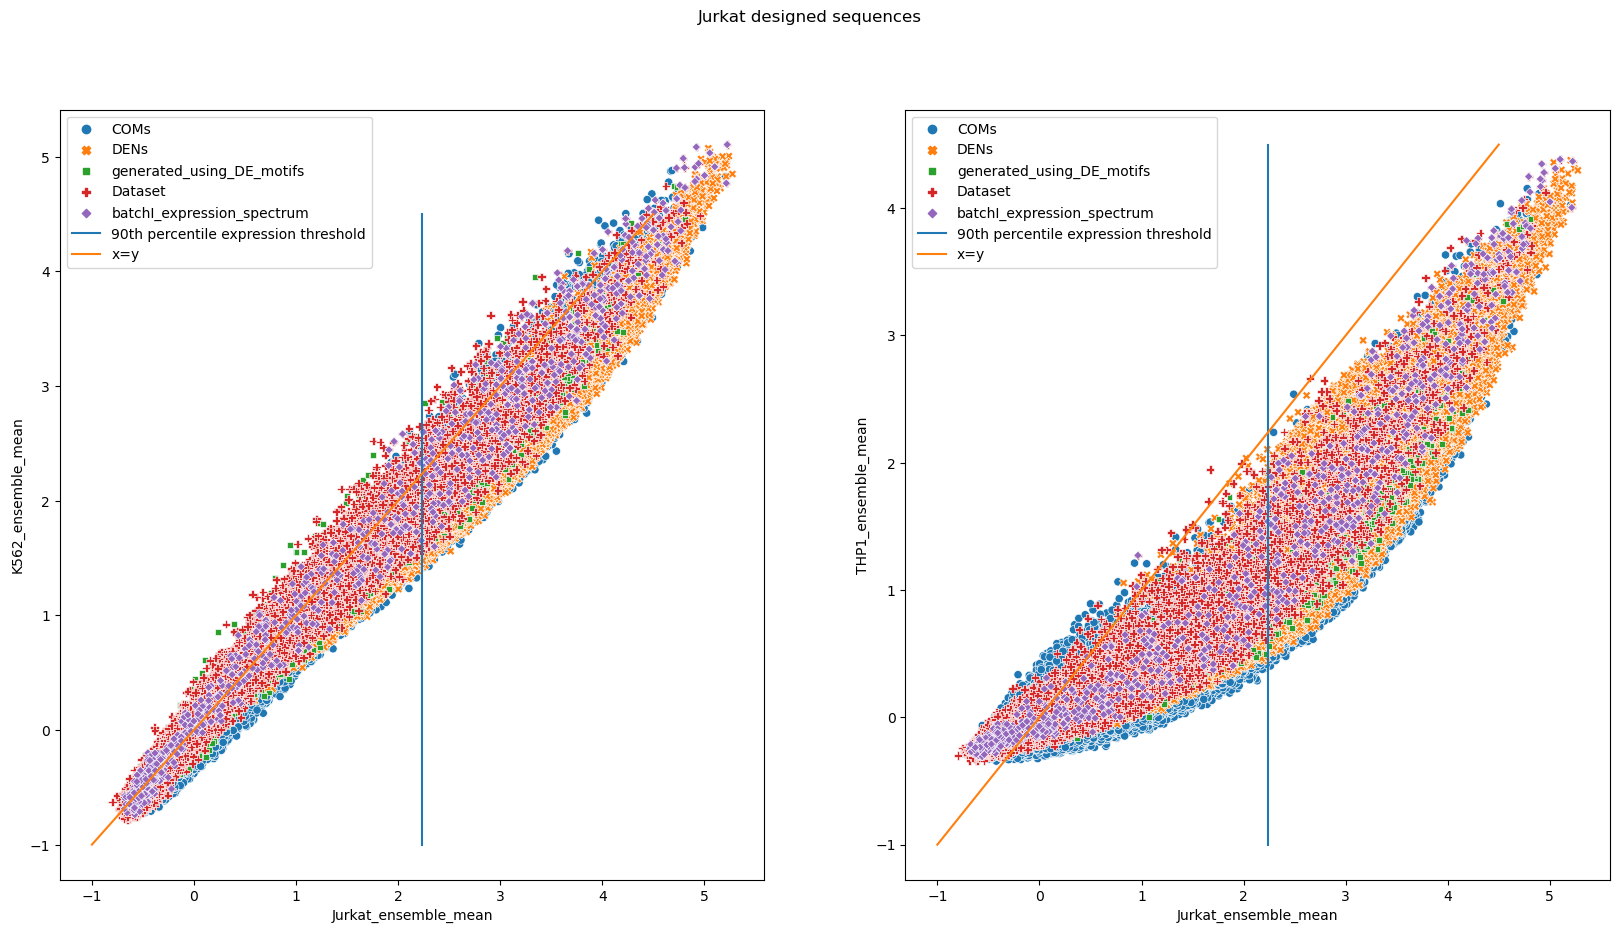

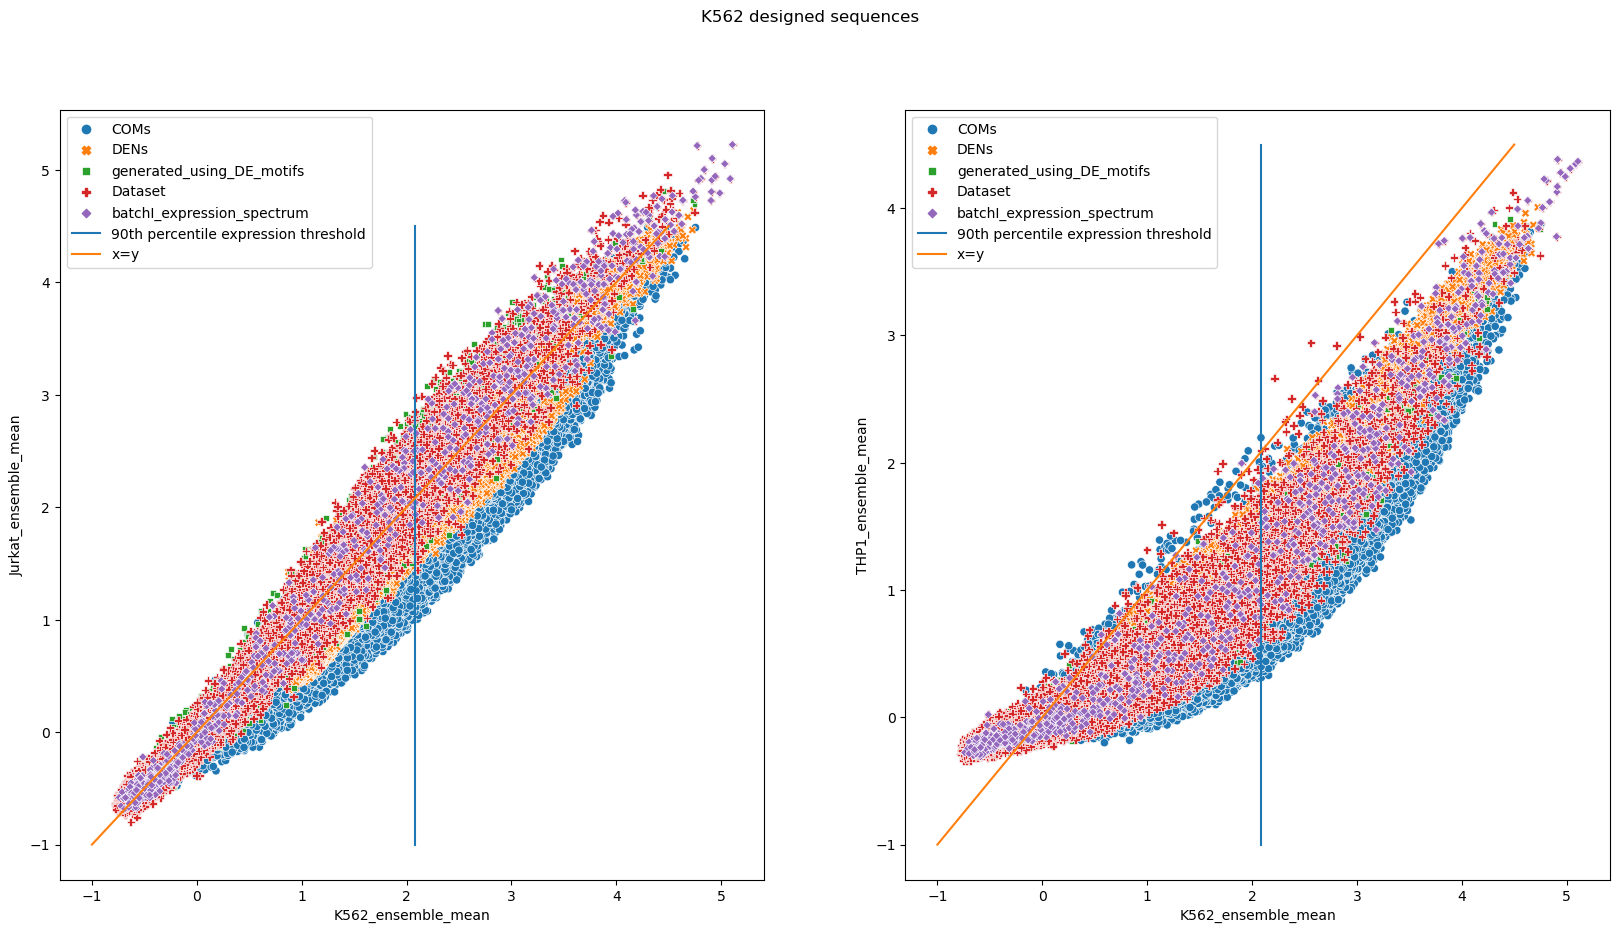

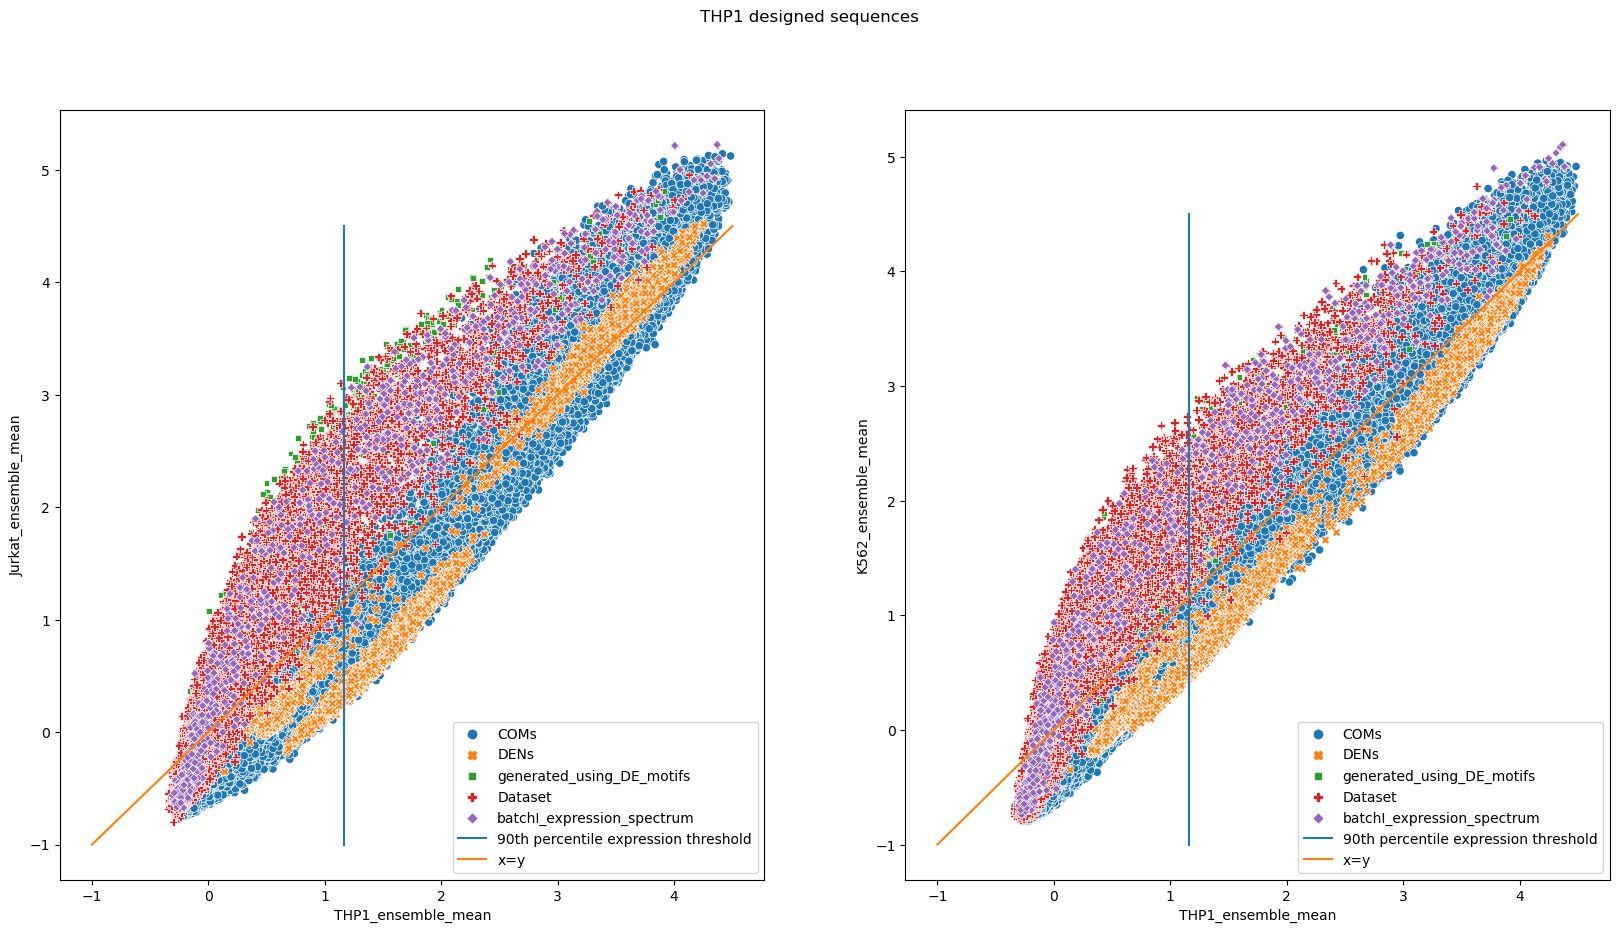

In [12]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    expression_percentile_thres_val = np.percentile(dataset_df[f"{cell1}_ensemble_mean"], expression_percentile_thres)
    
    subset_df = final_df[(final_df["designed_for"] == cell1) | (np.array(final_df["designed_for"]) == None)]
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    c = 0
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if i == j:
            continue
        
        sns.scatterplot(data=subset_df, 
                        x=f"{cell1}_ensemble_mean", 
                        y=f"{cell2}_ensemble_mean", 
                        hue="design_method", style="design_method",
                        hue_order=["COMs", 
                                   "DENs", 
                                   "generated_using_DE_motifs", 
                                   "Dataset",
                                   "batchI_expression_spectrum"],
                        ax=ax[c])
        ax[c].plot(np.zeros(5) + expression_percentile_thres_val, np.linspace(-1, 4.5, 5), 
                   label=f"{expression_percentile_thres}th percentile expression threshold")
        ax[c].plot(np.linspace(-1, 4.5), np.linspace(-1, 4.5), label="x=y")
        ax[c].legend()
        c += 1
        
    fig.suptitle(f"{cell1} designed sequences")
    plt.show()

In [13]:
# filter sequences based on predicted expression and sort by differential expression
coms_df["filter_out"] = False
dens_df["filter_out"] = False
coms_df["diff_exp"] = 0.0
dens_df["diff_exp"] = 0.0
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    print(cell1)
    expression_percentile_thres_val = np.percentile(dataset_df[f"{cell1}_ensemble_mean"], expression_percentile_thres)
    print(f"Expression threshold = {expression_percentile_thres_val}")
    
    ori_COMs_num_seqs = (coms_df['designed_for'] == cell1).sum()
    ori_DENs_num_seqs = (dens_df['designed_for'] == cell1).sum()
    print(f"We had {ori_COMs_num_seqs} COMs designed sequences")
    print(f"We had {ori_DENs_num_seqs} DENs designed sequences")
    
    coms_df.loc[(coms_df["designed_for"] == cell1) & 
                (coms_df[f"{cell1}_ensemble_mean"] < expression_percentile_thres_val), "filter_out"] = True
    dens_df.loc[(dens_df["designed_for"] == cell1) & 
                (dens_df[f"{cell1}_ensemble_mean"] < expression_percentile_thres_val), "filter_out"] = True
    
    COMs_left_after_exp_thres = ((coms_df['designed_for'] == cell1) & ~coms_df['filter_out']).sum()
    DENs_left_after_exp_thres = ((dens_df['designed_for'] == cell1) & ~dens_df['filter_out']).sum()
    print(f"After filtering based on the expression threshold, we have {COMs_left_after_exp_thres} COMs designed sequences")
    print(f"After filtering based on the expression threshold, we have {DENs_left_after_exp_thres} DENs designed sequences")
    
    coms_df.loc[coms_df["designed_for"] == cell1, 
                "diff_exp"] = coms_df.loc[coms_df["designed_for"] == cell1, 
                                          f"{cell1}_ensemble_mean"]
    dens_df.loc[dens_df["designed_for"] == cell1, 
                "diff_exp"] = dens_df.loc[dens_df["designed_for"] == cell1, 
                                          f"{cell1}_ensemble_mean"]
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if cell1 == cell2:
            continue
        coms_df.loc[(coms_df["designed_for"] == cell1) & 
                    (coms_df[f"{cell1}_ensemble_mean"] < coms_df[f"{cell2}_ensemble_mean"]), "filter_out"] = True
        dens_df.loc[(dens_df["designed_for"] == cell1) & 
                    (dens_df[f"{cell1}_ensemble_mean"] < dens_df[f"{cell2}_ensemble_mean"]), "filter_out"] = True
        
        coms_df.loc[coms_df["designed_for"] == cell1, 
                "diff_exp"] -= (coms_df.loc[coms_df["designed_for"] == cell1, 
                                          f"{cell2}_ensemble_mean"] * 0.5)
        dens_df.loc[dens_df["designed_for"] == cell1, 
                "diff_exp"] -= (dens_df.loc[dens_df["designed_for"] == cell1, 
                                          f"{cell2}_ensemble_mean"] * 0.5)
        
    COMs_left_after_DE_filt = ((coms_df['designed_for'] == cell1) & ~coms_df['filter_out']).sum()
    DENs_left_after_DE_filt = ((dens_df['designed_for'] == cell1) & ~dens_df['filter_out']).sum()
    print(f"After filtering based on the having non-zero DE, we have {COMs_left_after_DE_filt} COMs designed sequences")
    print(f"After filtering based on the having non-zero DE, we have {DENs_left_after_DE_filt} DENs designed sequences")

Jurkat
Expression threshold = 2.236714768409729
We had 102144 COMs designed sequences
We had 69098 DENs designed sequences
After filtering based on the expression threshold, we have 36981 COMs designed sequences
After filtering based on the expression threshold, we have 52748 DENs designed sequences
After filtering based on the having non-zero DE, we have 36574 COMs designed sequences
After filtering based on the having non-zero DE, we have 52693 DENs designed sequences
K562
Expression threshold = 2.0850200653076176
We had 102144 COMs designed sequences
We had 38668 DENs designed sequences
After filtering based on the expression threshold, we have 49940 COMs designed sequences
After filtering based on the expression threshold, we have 7570 DENs designed sequences
After filtering based on the having non-zero DE, we have 46732 COMs designed sequences
After filtering based on the having non-zero DE, we have 4613 DENs designed sequences
THP1
Expression threshold = 1.1621332049369815
We had

In [14]:
coms_df = coms_df[~coms_df["filter_out"]].sort_values(by="diff_exp").reset_index(drop=True)
dens_df = dens_df[~dens_df["filter_out"]].sort_values(by="diff_exp").reset_index(drop=True)
coms_df.to_parquet(os.path.join(ensemble_predictions_dir, "filtered_coms_sequences_ensemble_3.parquet"))
dens_df.to_parquet(os.path.join(ensemble_predictions_dir, "filtered_dens_sequences_ensemble_3.parquet"))

Jurkat


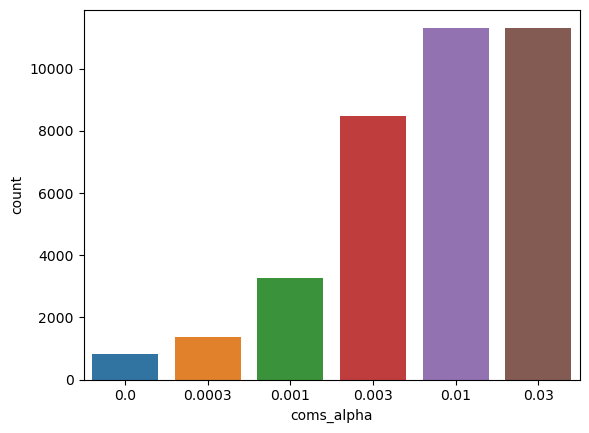

K562


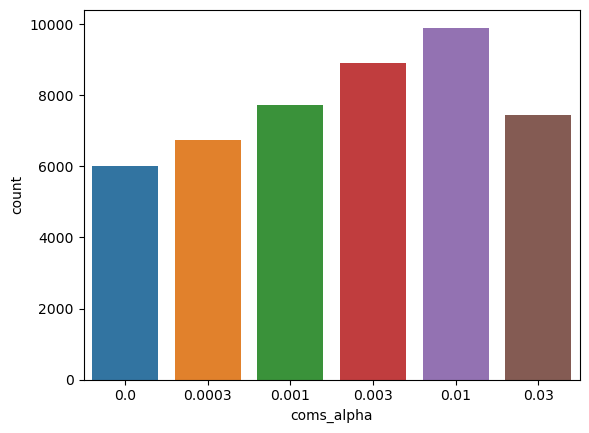

THP1


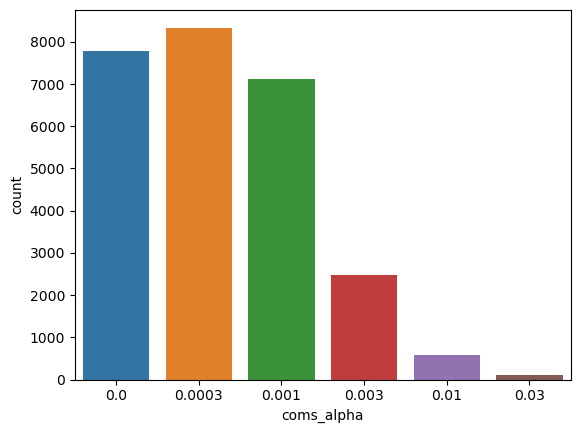

In [15]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    print(cell1)
    sns.countplot(data=coms_df[coms_df["designed_for"] == cell1], x="coms_alpha")
    plt.show()

In [16]:
final_df = pd.concat([coms_df, 
                      dens_df, 
                      sequences_generated_using_DE_motifs_df,
                      dataset_df,
                      sequences_from_batch_1_expression_spectrum_df]).reset_index(drop=True)
final_df.to_parquet(os.path.join(ensemble_predictions_dir, "filtered_ensemble_3_predictions.parquet"))
final_df

design_method designed_for  \
0                             COMs         THP1   
1                             COMs         THP1   
2                             COMs         THP1   
3                             COMs         THP1   
4                             COMs         THP1   
...                            ...          ...   
191220  batchI_expression_spectrum         None   
191221  batchI_expression_spectrum         None   
191222  batchI_expression_spectrum         None   
191223  batchI_expression_spectrum         None   
191224  batchI_expression_spectrum         None   

                                        original_sequence  \
0       TGTGGGGTCAGCCTTTGACTCTACCCTCATTCTGTTAACTCATCCC...   
1       GTGACGCCAGCCGAATAACAGCAGCACAAAAACCTGACCCAAGTCA...   
2       ACCAGTTCCCGGGCGTCCTCCAGGTCCTCGCTTTCCCCCTTCCCCC...   
3       AATGGGTGGCGGCGGTGGGCGGTGACGGCCGGCGGGGCCTGACCAA...   
4       GCCCCGCCCGTTTCCGGTGGCCCTCCGATGGCCTCCGGTGTCTCGG...   
...                                                   ...   
191220                                               None   
191221                                               None   
191222                                               None   
191223                                               None   
191224                                               None   

                                                 sequence provenance  \
0       TGAGGCGTCCGCCATCATCTCTTTCTCGCTTCCGGGCGGTCGACTT...       None   
1       GAGACCCGACCGGAGGCAAGGGAGATCGAGGAGCGACGAACGGTCT...       None   
2       TCTCCCTTCGACGCGACTTCCTCAGCTGTTTTCTATTCCTTGAACG...       None   
3       TCCGCGCGGCGGCGGCCCGGGGAGCCGCCCTGCGACACCAGACGCG...       None   
4       GGCCCCCGGGCTGTCACATCCCGGCTGATGGAATCGGTTCTCTCTT...       None   
...                                                   ...        ...   
191220  AGCTTTATAGGAATGCTGTTGCTTTAAATCCGAAATCCCGTGCCGG...       None   
191221  AAACTCAGCGTGGGGTGGTGGGTTTCCCCGTCTTCTGGGAGACCCG...       None   
191222  GCGCGGGGCCAATCAGCGTGCGCCGTTCCGAAAGTTGCCTTTTATG...       None   
191223  GTGCGTCGGCTTCCGTACAACACGGATACTCTCTCTCTGACGCAAC...       None   
191224  GCAAGTGGGCAGTGAGTGTGCCACGGACTGGCCTGGGCTGTGGCCT...       None   

        coms_alpha diversity_loss_coef entropy_loss_coef  \
0           0.0100                None              None   
1           0.0010                None              None   
2           0.0010                None              None   
3           0.0003                None              None   
4           0.0000                None              None   
...            ...                 ...               ...   
191220         NaN                None              None   
191221         NaN                None              None   
191222         NaN                None              None   
191223         NaN                None              None   
191224         NaN                None              None   

       base_entropy_loss_coef  Jurkat_ensemble_mean  ...  K562_measured  \
0                        None              3.850878  ...           None   
1                        None              3.722266  ...           None   
2                        None              2.488278  ...           None   
3                        None              3.609151  ...           None   
4                        None              3.042055  ...           None   
...                       ...                   ...  ...            ...   
191220                   None              4.539459  ...       5.882017   
191221                   None             -0.396737  ...       5.780755   
191222                   None              4.029407  ...        5.68394   
191223                   None              2.160121  ...       4.775424   
191224                   None             -0.409076  ...        6.17558   

        THP1_ensemble_mean THP1_ensemble_std  THP1_design_model  \
0                 3.851112          0.817073           3.246437   
1                 3.722335          0.806918          

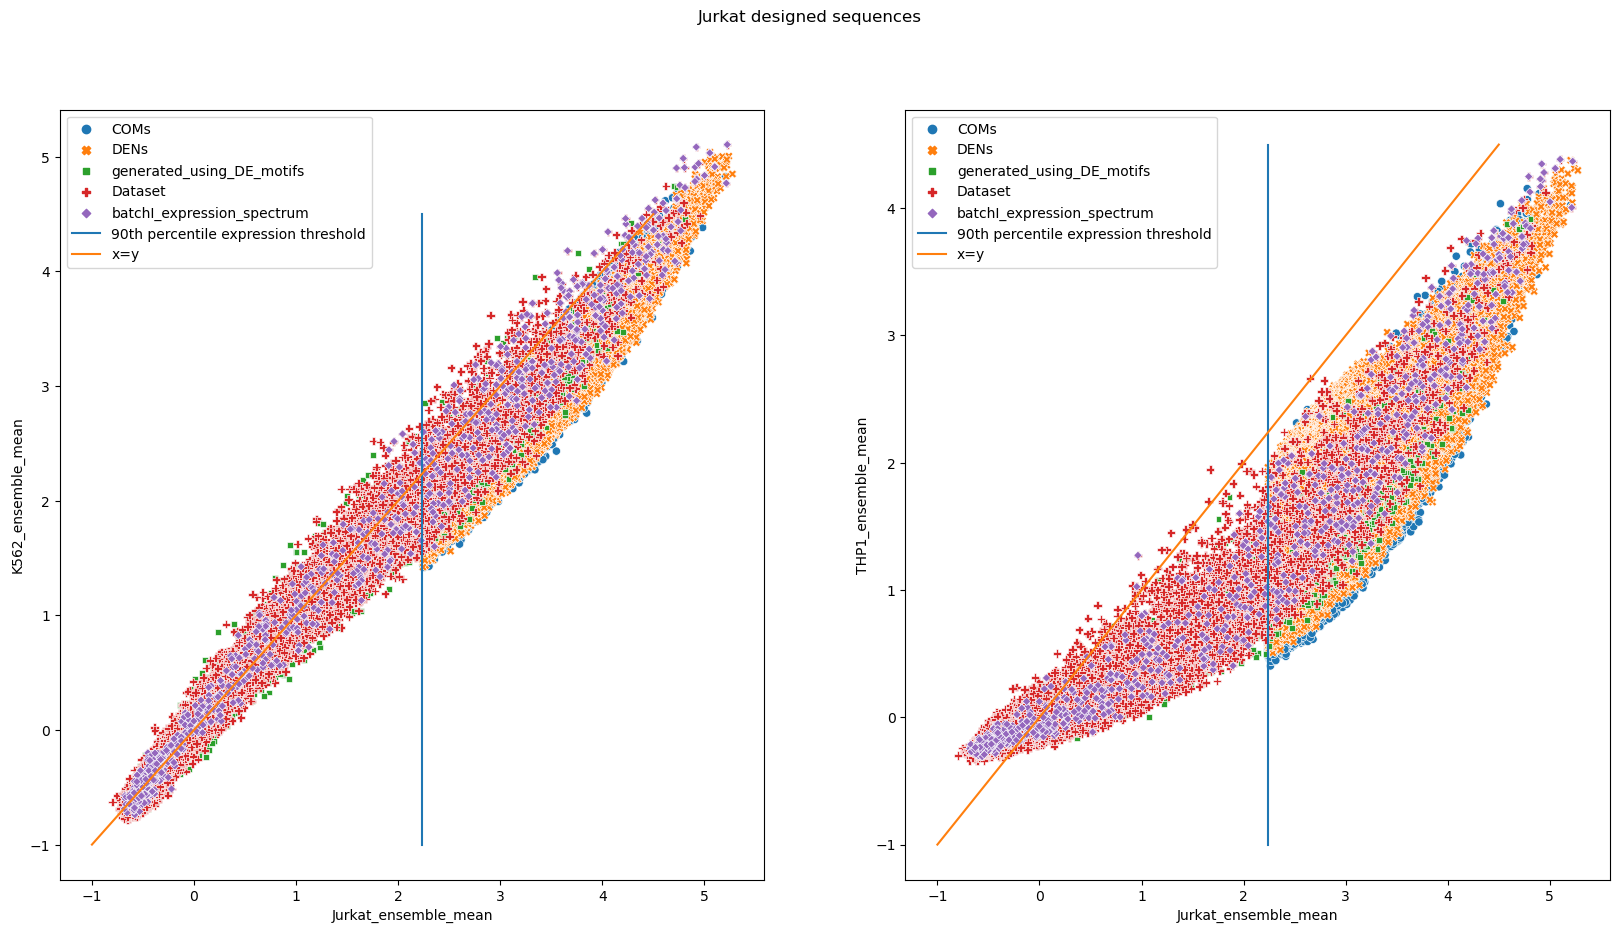

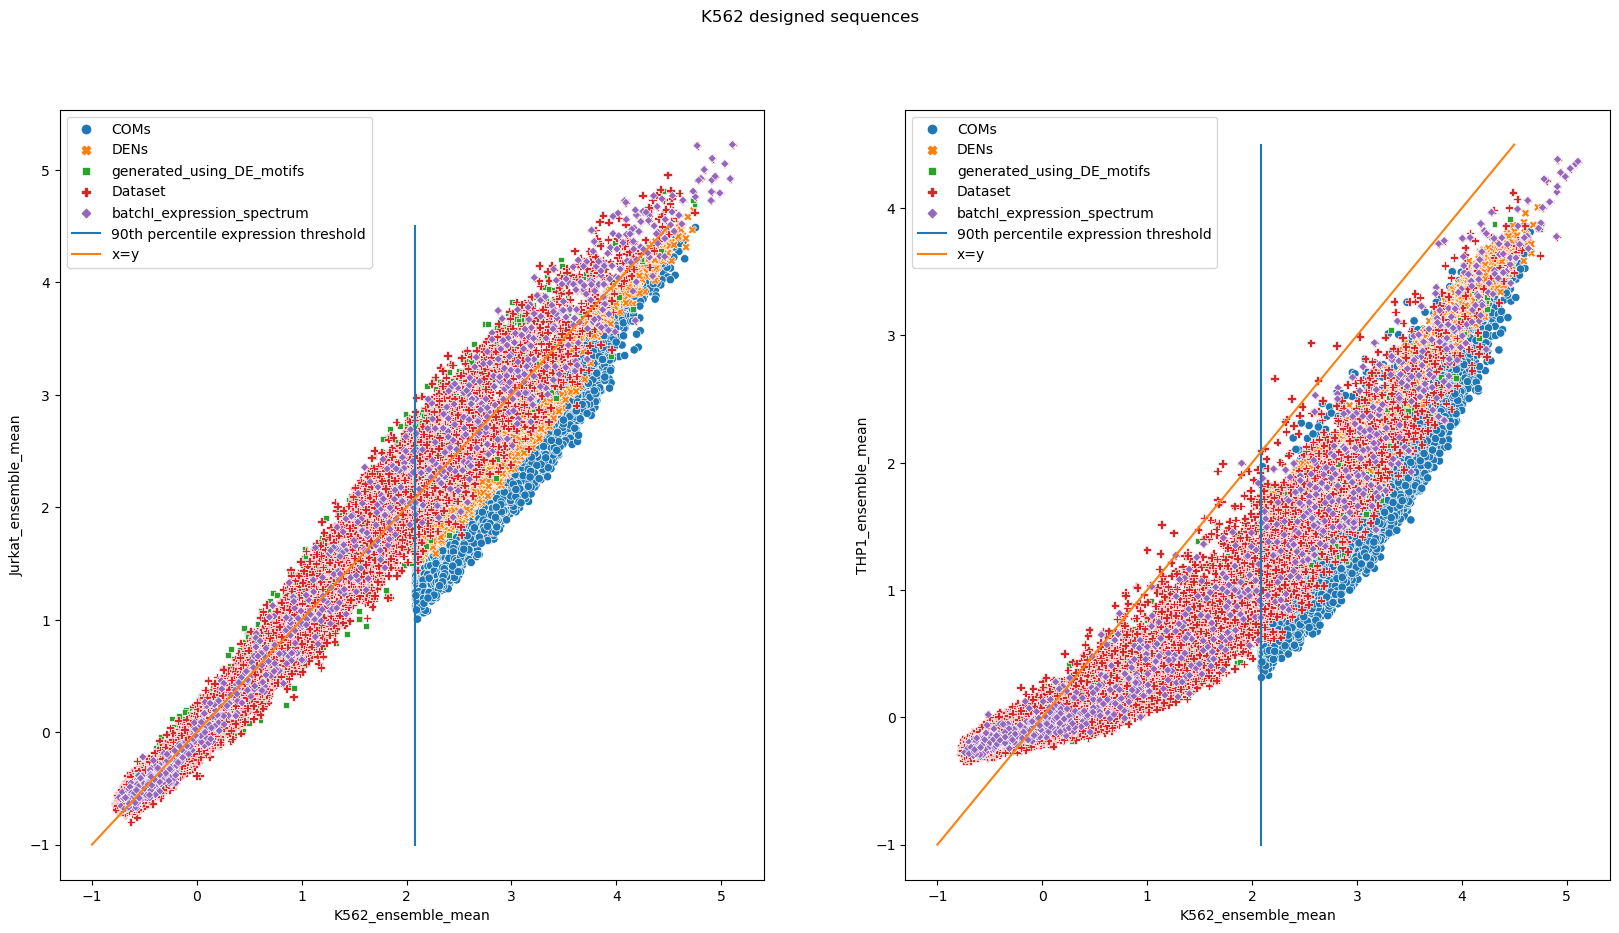

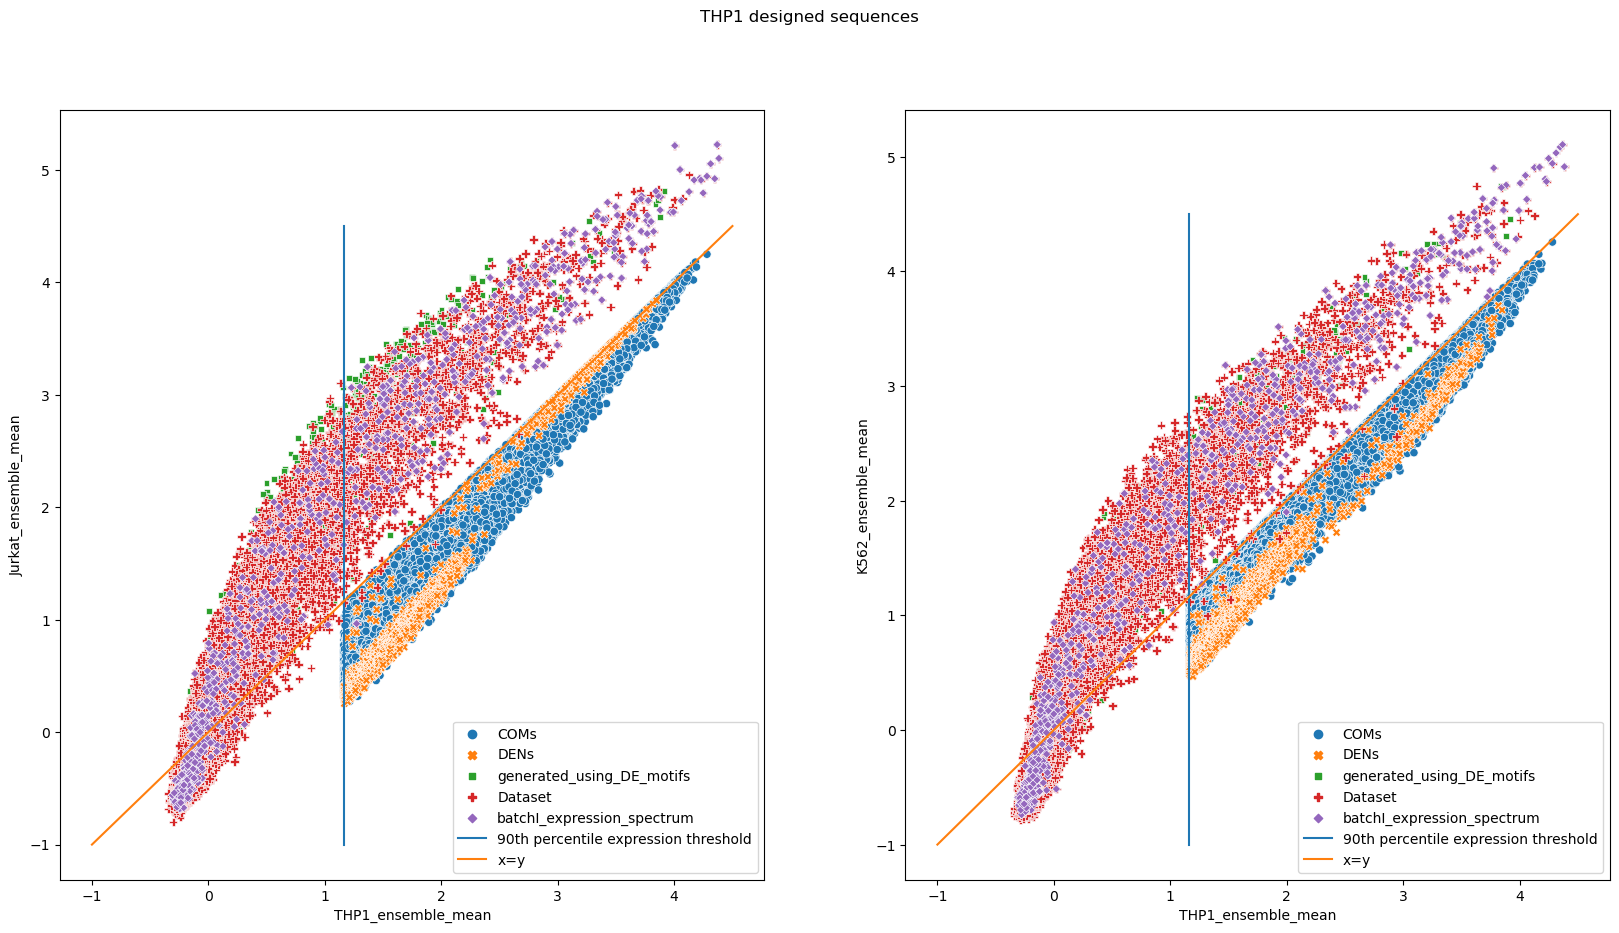

In [17]:
for i, cell1 in enumerate(["Jurkat", "K562", "THP1"]):
    expression_percentile_thres_val = np.percentile(dataset_df[f"{cell1}_ensemble_mean"], expression_percentile_thres)
    
    subset_df = final_df[(final_df["designed_for"] == cell1) | (np.array(final_df["designed_for"]) == None)]
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    
    c = 0
    for j, cell2 in enumerate(["Jurkat", "K562", "THP1"]):
        if i == j:
            continue
        
        sns.scatterplot(data=subset_df, 
                        x=f"{cell1}_ensemble_mean", 
                        y=f"{cell2}_ensemble_mean", 
                        hue="design_method", style="design_method",
                        hue_order=["COMs", 
                                   "DENs", 
                                   "generated_using_DE_motifs", 
                                   "Dataset",
                                   "batchI_expression_spectrum"],
                        ax=ax[c])
        ax[c].plot(np.zeros(5) + expression_percentile_thres_val, np.linspace(-1, 4.5, 5), 
                   label=f"{expression_percentile_thres}th percentile expression threshold")
        ax[c].plot(np.linspace(-1, 4.5), np.linspace(-1, 4.5), label="x=y")
        ax[c].legend()
        c += 1
        
    fig.suptitle(f"{cell1} designed sequences")
    plt.show()

In [18]:
coms_df[["designed_for", "sequence", "Jurkat_ensemble_mean", "K562_ensemble_mean", "THP1_ensemble_mean", "diff_exp"]].sort_values(by="diff_exp", ascending=False)

designed_for                                           sequence  \
109718       Jurkat  TATTGGATAATCCCACCGCGTCTCTCGGCGGCGGGGGGCGACAGCG...   
109717       Jurkat  CTCGCGTCGCGAGAATCGTATCCCCGCCCGGCGCGGGGGGGAAGCG...   
109716       Jurkat  CCCTAAAATTGATTCACCAATGCGCATGCGCGCGCGCCGTCAGGGC...   
109715       Jurkat  GTTGGTATCGCGCCTGCGCGGGCGTCTCGTGAGTGTACGGGGGGCA...   
109714       Jurkat  CTTGCTCAAGCCGTCAGACGAGGTTGGGGACGGGGTGTGACGCCAC...   
...             ...                                                ...   
4              THP1  GGCCCCCGGGCTGTCACATCCCGGCTGATGGAATCGGTTCTCTCTT...   
3              THP1  TCCGCGCGGCGGCGGCCCGGGGAGCCGCCCTGCGACACCAGACGCG...   
2              THP1  TCTCCCTTCGACGCGACTTCCTCAGCTGTTTTCTATTCCTTGAACG...   
1              THP1  GAGACCCGACCGGAGGCAAGGGAGATCGAGGAGCGACGAACGGTCT...   
0              THP1  TGAGGCGTCCGCCATCATCTCTTTCTCGCTTCCGGGCGGTCGACTT...   

        Jurkat_ensemble_mean  K562_ensemble_mean  THP1_ensemble_mean  diff_exp  
109718              3.418169            2.358199            1.362569  1.557785  
109717              3.550201            2.432826            1.552619  1.557479  
109716              3.385875            2.475621            1.276851  1.509639  
109715              3.236482            2.231899            1.225304  1.507881  
109714              3.717358            2.890797            1.534827  1.504546  
...                      ...                 ...                 ...       ...  
4                   3.042055            3.052322            3.052645  0.005457  
3                   3.609151            3.611386            3.613933  0.003664  
2                   2.488278            2.492527            2.493764  0.003361  
1                   3.722266            3.721614            3.722335  0.000395  
0                   3.850878            3.851033            3.851112  0.000157  

[109719 rows x 6 columns]

In [19]:
dens_df[["designed_for", "sequence", "Jurkat_ensemble_mean", "K562_ensemble_mean", "THP1_ensemble_mean", "diff_exp"]].sort_values(by="diff_exp", ascending=False)

designed_for                                           sequence  \
61898       Jurkat  ATATGAATAATAATGCGTATCGCGCGCGTGTGCCGCATGCGCGTGC...   
61897       Jurkat  TCGCTTAATCGCTCCTCCGCGCACGCGCGCTGAGAGGGGAGCTCAT...   
61896       Jurkat  GCGCGTGGTTAGCGTCGGCGATATCGCGAGCGCGAGATAGGTAGGT...   
61895       Jurkat  CGCACTGACTCGCAGCGCGCACGCGCGCATCGCCGCGCGCGCGCTG...   
61894       Jurkat  AAAAATAAGAATATGGGTATAGCGTGCGCGCGAATCGCGCGCATTA...   
...            ...                                                ...   
4             THP1  CGCCGGCGACGACCGCGACACGCGACGACGACGCGCGACACGACGC...   
3             THP1  GGCGGCGCCGGGCGCGGGGCGCGCGGCGGCGCGGCGGCGCGACGTT...   
2             THP1  CGCCGCCGCGGCGGCGGCGCCGCGGGCGCCATCTTCGCCGGCGGCG...   
1             THP1  GCCCGCGGCGCGCCGCCGCGGCGTTGCGCCGCGGCGGCGGCGGCGG...   
0             THP1  CCCACGACGCCGCCCCGCGGCGGCGGCCGCCGCGACGCGACGGCCA...   

       Jurkat_ensemble_mean  K562_ensemble_mean  THP1_ensemble_mean  diff_exp  
61898              3.825896            2.907309            1.709141  1.517671  
61897              3.293742            2.347541            1.212879  1.513532  
61896              3.312797            2.356440            1.302290  1.483432  
61895              3.256848            2.348737            1.205702  1.479628  
61894              3.851221            3.061559            1.690749  1.475067  
...                     ...                 ...                 ...       ...  
4                  2.260785            2.238666            2.349647  0.099922  
3                  3.836866            3.663181            3.849198  0.099174  
2                  3.531965            3.359551            3.544027  0.098269  
1                  3.806780            3.703294            3.817784  0.062747  
0                  2.693341            2.618329            2.701711  0.045876  

[61899 rows x 6 columns]

In [21]:
all_ensemble_1_predictions = pd.read_parquet(os.path.join(ensemble_predictions_dir, "all_ensemble_1_predictions.parquet"))
all_ensemble_3_predictions = pd.read_parquet(os.path.join(ensemble_predictions_dir, "all_ensemble_3_predictions.parquet"))

In [25]:
for cell in ["Jurkat", "K562", "THP1"]:
    print(cell, stats.spearmanr(all_ensemble_1_predictions[f"{cell}_ensemble_mean"], 
                                all_ensemble_3_predictions[f"{cell}_ensemble_mean"]))

Jurkat SignificanceResult(statistic=0.9735767415547069, pvalue=0.0)
K562 SignificanceResult(statistic=0.9475847985856007, pvalue=0.0)
THP1 SignificanceResult(statistic=0.9727511628838079, pvalue=0.0)


In [26]:
filtered_ensemble_1_predictions = pd.read_parquet(os.path.join(ensemble_predictions_dir, "filtered_ensemble_1_predictions.parquet"))
filtered_ensemble_3_predictions = pd.read_parquet(os.path.join(ensemble_predictions_dir, "filtered_ensemble_3_predictions.parquet"))

In [35]:
s1 = set(filtered_ensemble_1_predictions[(filtered_ensemble_1_predictions["design_method"] == "COMs") | 
                                (filtered_ensemble_1_predictions["design_method"] == "DENs")]["sequence"])
s3 = set(filtered_ensemble_3_predictions[(filtered_ensemble_3_predictions["design_method"] == "COMs") | 
                                (filtered_ensemble_3_predictions["design_method"] == "DENs")]["sequence"])

In [38]:
print(len(s1), len(s3), len(s1.intersection(s3)))

231994 171618 165518
